In [15]:
# Importing all the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path

plt.style.use('dark_background')

In [16]:
base_path=Path.cwd().parent
csv_path=base_path/"output"/"metadata.csv"
print(csv_path)

c:\Users\khadk\OneDrive\Desktop\phylogenetics\output\metadata.csv


In [17]:
trees=pd.read_csv(csv_path)
trees.shape

(5000, 10)

In [18]:
trees.head()

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,num_leaves_before_t1,num_leaves_after_t1,tree_height
0,1,7.755243,0.300436,0.583149,0.718057,2.422976,261,19,242,12.150147
1,6,5.408794,0.396355,0.413940,0.905547,3.557958,172,16,156,8.798971
2,0,4.482161,0.497817,0.066191,0.708665,2.018186,149,15,134,9.646636
3,5,7.033803,0.504905,0.789482,0.865987,3.005234,640,36,604,11.564251
4,9,4.254373,0.453313,0.542000,0.800224,2.065512,485,37,448,8.500928


In [19]:
trees.isnull().mean()*100

file_id                 0.0
t1                      0.0
la1                     0.0
mu_over_la1             0.0
psi                     0.0
la2_multiplier          0.0
n_tips                  0.0
num_leaves_before_t1    0.0
num_leaves_after_t1     0.0
tree_height             0.0
dtype: float64

In [20]:
trees.duplicated().sum()

np.int64(0)

In [21]:
trees.describe().T

,count,mean,std,min,25%,50%,75%,max
file_id,5000.0,2499.500000,1443.520003,0.000000,1249.750000,2499.500000,3749.250000,4999.000000
t1,5000.0,6.441901,1.052516,4.000615,5.663727,6.591949,7.335427,7.998811
la1,5000.0,0.371175,0.200930,0.010650,0.224002,0.341477,0.488760,0.998992
mu_over_la1,5000.0,0.490904,0.259075,0.000604,0.269705,0.514666,0.718883,0.899899
psi,5000.0,0.733293,0.187559,0.130526,0.605880,0.763646,0.891435,0.999922
la2_multiplier,5000.0,3.105462,0.837958,2.010213,2.378306,2.903555,3.720317,4.999694
n_tips,5000.0,349.573000,193.958493,100.000000,202.000000,302.000000,448.000000,998.000000
num_leaves_before_t1,5000.0,26.228400,12.520079,15.000000,17.000000,22.000000,31.000000,114.000000
num_leaves_after_t1,5000.0,323.344600,184.166575,64.000000,183.000000,282.000000,418.000000,947.000000
tree_height,5000.0,11.913745,5.197999,7.085792,9.690405,10.831459,12.304981,147.948779


In [22]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_id               5000 non-null   int64  
 1   t1                    5000 non-null   float64
 2   la1                   5000 non-null   float64
 3   mu_over_la1           5000 non-null   float64
 4   psi                   5000 non-null   float64
 5   la2_multiplier        5000 non-null   float64
 6   n_tips                5000 non-null   int64  
 7   num_leaves_before_t1  5000 non-null   int64  
 8   num_leaves_after_t1   5000 non-null   int64  
 9   tree_height           5000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 390.8 KB


In [23]:
def plot_kde(df:pd.DataFrame,cols:str):
    fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,8))
    axes=axes.flatten()
    for index,col in enumerate(cols):
        if index<len(axes):
            sns.kdeplot(df[col],fill=True,color='purple',ax=axes[index])
            axes[index].set_title(f'KDE of {col}')
    plt.tight_layout()
    plt.show()

In [24]:
num_cols=[col for col in trees.columns if col!='tree_id']
num_cols

['file_id',
 't1',
 'la1',
 'mu_over_la1',
 'psi',
 'la2_multiplier',
 'n_tips',
 'num_leaves_before_t1',
 'num_leaves_after_t1',
 'tree_height']

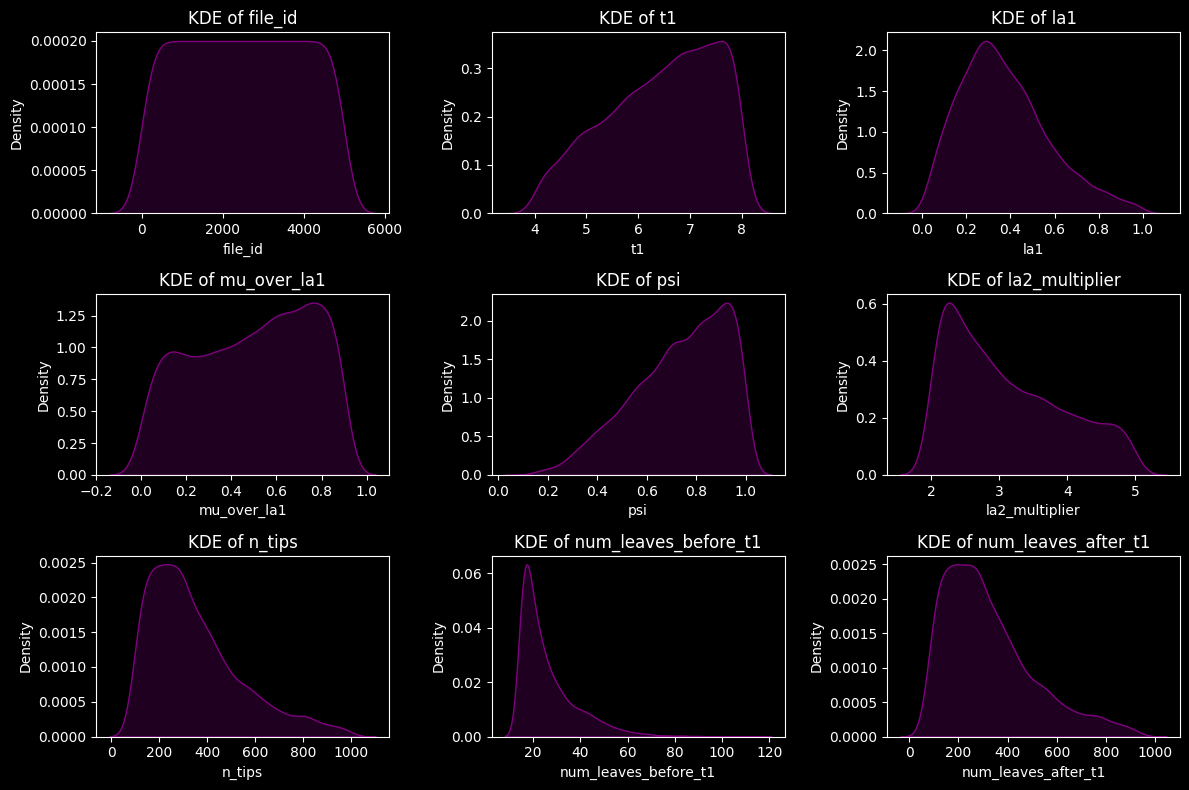

In [25]:
plot_kde(trees,num_cols)

In [26]:
trees

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,num_leaves_before_t1,num_leaves_after_t1,tree_height
0,1,7.755243,0.300436,0.583149,0.718057,2.422976,261,19,242,12.150147
1,6,5.408794,0.396355,0.413940,0.905547,3.557958,172,16,156,8.798971
2,0,4.482161,0.497817,0.066191,0.708665,2.018186,149,15,134,9.646636
3,5,7.033803,0.504905,0.789482,0.865987,3.005234,640,36,604,11.564251
4,9,4.254373,0.453313,0.542000,0.800224,2.065512,485,37,448,8.500928
...,...,...,...,...,...,...,...,...,...,...
4995,4998,5.413457,0.262506,0.281647,0.545954,4.987686,359,18,341,9.250411
4996,4997,4.816320,0.677231,0.648208,0.720984,2.509182,142,22,120,8.313333
4997,4991,7.611773,0.572005,0.438913,0.742582,2.896310,218,17,201,10.707600
4998,4993,7.658079,0.551942,0.313093,0.832294,2.071357,124,23,101,10.959756
